### Importing the necessary libraries
We will be importing libraries at different stages of the program as well, but these are required to start the project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import cv2
import pydicom as dicom
import seaborn as sns

### Data Preprocessing
In this section we will be pre-processing the data we have and make it suitable for analysis and model creation

In [2]:
# Address where data is stored and this will be usefull while declaring other addresses
dataset_address = "../input/rsna-pneumonia-detection-challenge/"

In [3]:
# Importing training csv file as dataframes

# train_label is a dataframe containing original patientId, coordinate for bounding box and target values defining if the patient have pnemonia or not
train_label = pd.read_csv(dataset_address + "stage_2_train_labels.csv")
train_label.sample(10)

,patientId,x,y,width,height,Target
8497,5fd88893-6d79-4bb9-9ead-c5111c3de622,NaN,NaN,NaN,NaN,0
8933,63789246-648f-4eb8-94ee-e5d538678618,NaN,NaN,NaN,NaN,0
12653,80823d24-7cc3-4aac-9be2-2bd1b46dc703,NaN,NaN,NaN,NaN,0
27783,f6817f19-9e9c-4db0-9c58-4a17f576b48c,NaN,NaN,NaN,NaN,0
2111,26950e98-3b48-4d7c-b2d0-daa4249be551,55.0,537.0,314.0,369.0,1
12500,7f645a7a-fe05-43df-9deb-b55414798991,NaN,NaN,NaN,NaN,0
27327,f2b3b055-d209-4a47-97ab-ffcab564c313,NaN,NaN,NaN,NaN,0
14903,928aaa10-715f-4b4f-a1df-16f16310b20e,NaN,NaN,NaN,NaN,0
191,05d3817a-5535-4e77-8dda-d4412e496c81,256.0,73.0,274.0,682.0,1
23295,d1d01959-a2d0-4168-b6bf-463b32923198,NaN,NaN,NaN,NaN,0


In [4]:
def img_to_read(patientId):
    address = dataset_address + "stage_2_train_images/" + patientId + ".dcm" #Address for the file
    
    ds = dicom.read_file(address)
    return([ds.PatientSex,int(ds.PatientAge),ds.ViewPosition])

In [5]:
npp = []
for i in train_label['patientId']:
    npp.append(img_to_read(i))
npp = np.array(npp).transpose()
train_label = train_label.assign(Sex = npp[0], Age = npp[1], Position = npp[2])
train_label

,patientId,x,y,width,height,Target,Sex,Age,Position
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,F,51,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,F,48,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,M,19,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,M,28,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,F,32,AP
...,...,...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1,M,54,AP
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0,F,46,PA
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0,M,45,PA
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1,F,72,AP


Text(0.5, 1.0, 'Distribution of PatientAge\nPresence of Pneumonia')

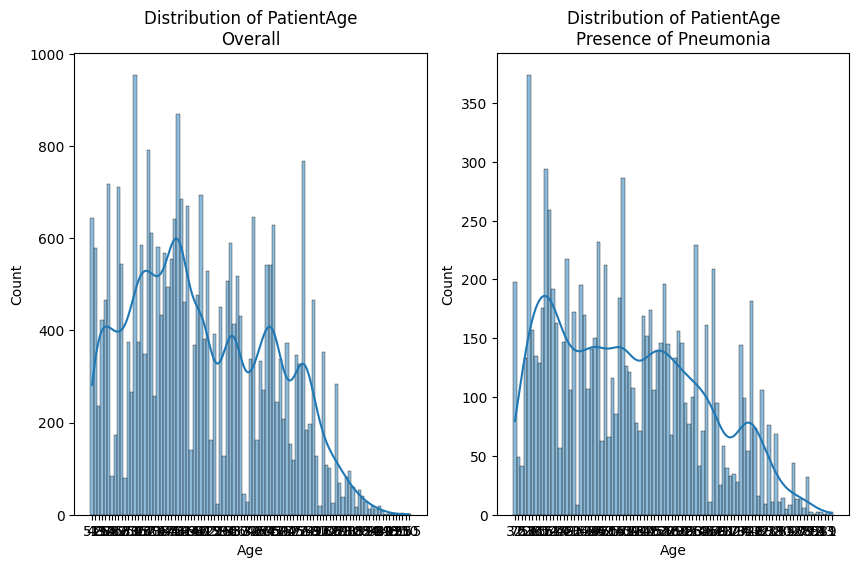

In [6]:
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(10,6))

sns.histplot(train_label['Age'], kde=True, ax=ax1)
ax1.set_title('Distribution of PatientAge\nOverall')

sns.histplot(train_label.loc[train_label['Target']==1, 'Age'], kde=True, ax=ax2)
ax2.set_title('Distribution of PatientAge\nPresence of Pneumonia')

In [7]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

<AxesSubplot:>

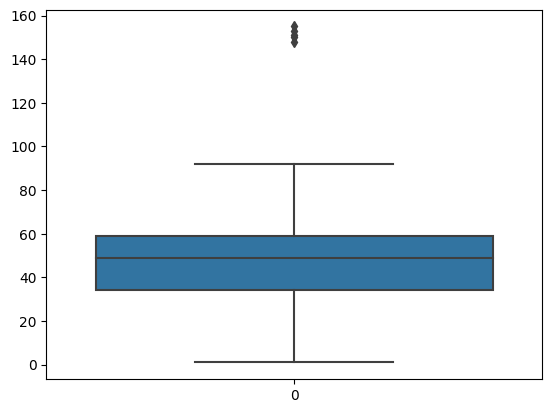

In [8]:
sns.boxplot(data = train_label['Age'])

In [9]:
train_label = train_label.astype({'Age' : int})

In [10]:
col = 'Age'
low_lead_time,up_lead_time = remove_outlier(train_label[col])
train_label[col] = np.where(train_label[col]>up_lead_time,up_lead_time,train_label[col])
train_label[col] = np.where(train_label[col]<low_lead_time,low_lead_time,train_label[col])

<AxesSubplot:>

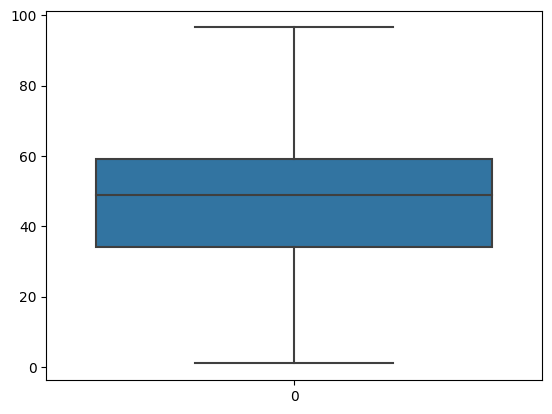

In [11]:
sns.boxplot(data = train_label['Age'])

Text(0.5, 1.0, 'Distribution of PatientAge\nPresence of Pneumonia')

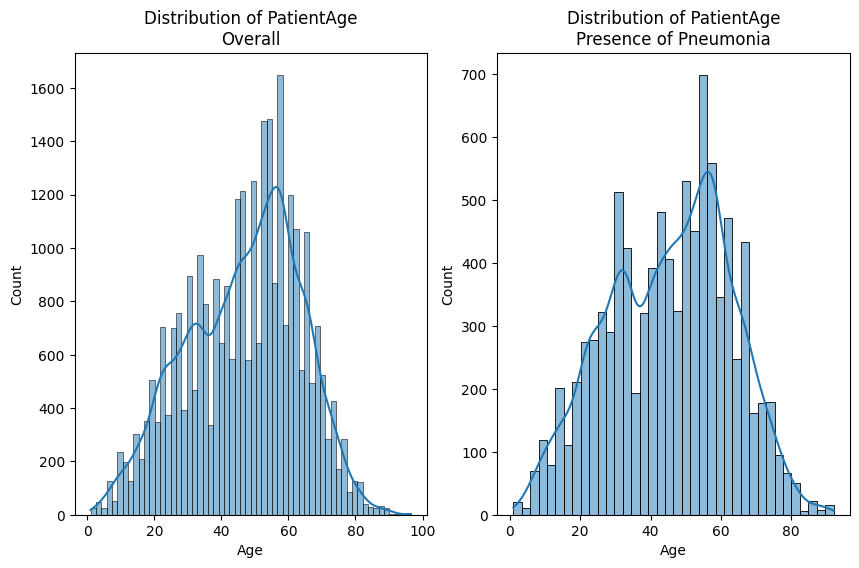

In [12]:
fig, (ax1,ax2) =plt.subplots(1,2,figsize=(10,6))

sns.histplot(train_label['Age'], kde=True, ax=ax1)
ax1.set_title('Distribution of PatientAge\nOverall')

sns.histplot(train_label.loc[train_label['Target']==1, 'Age'], kde=True, ax=ax2)
ax2.set_title('Distribution of PatientAge\nPresence of Pneumonia')

C:\Users\U1137870\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

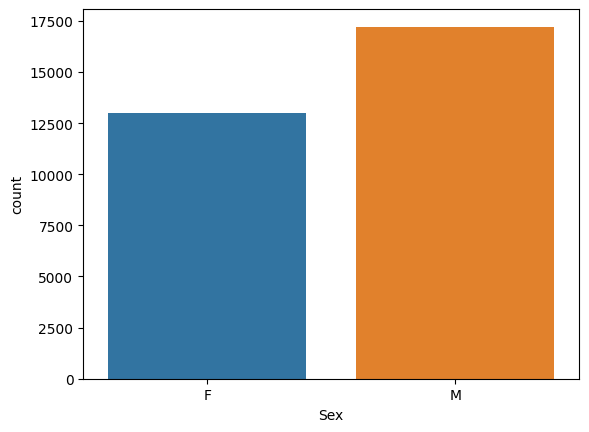

In [13]:
sns.countplot(train_label['Sex'])

C:\Users\U1137870\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

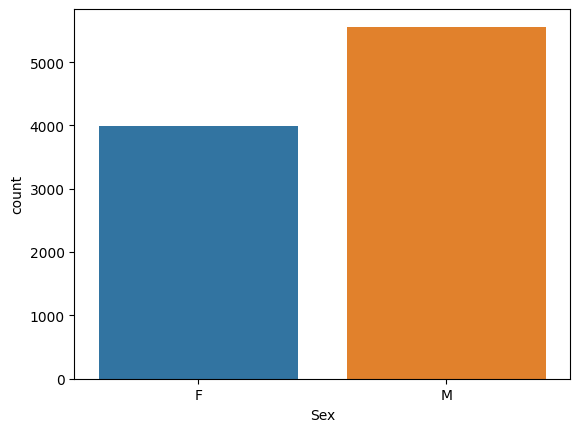

In [14]:
pneumonic = train_label.loc[train_label.Target == 1]
sns.countplot(pneumonic["Sex"])

### Observation from above graphs
As we can see that distribution and pneumonic data is almost similar, there is not enough evidence to prove any relation between pneumonic and gender

C:\Users\U1137870\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Position', ylabel='count'>

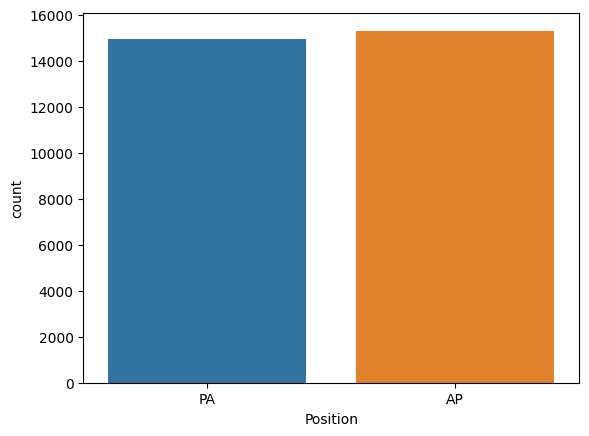

In [15]:
sns.countplot(train_label['Position'])

### Encoding the data for training

Sex is changed as M into 1 and F into 0

Position is changed as PA into 1 and AP into 0

In [16]:
train_label['Sex'] = np.where(train_label.Sex == 'M', 1, 0)
train_label['Position'] = np.where(train_label.Position == 'PA', 1, 0)
train_label

,patientId,x,y,width,height,Target,Sex,Age,Position
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,0,51.0,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,0,48.0,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,1,19.0,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,1,28.0,1
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,0,32.0,0
...,...,...,...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1,1,54.0,0
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0,0,46.0,1
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0,1,45.0,1
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1,0,72.0,0


<AxesSubplot:>

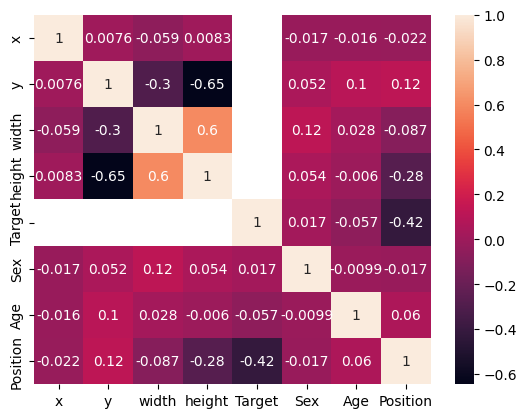

In [17]:
corr = train_label.corr()
sns.heatmap(corr,annot=True)

### Observation
##### From the above correlation plot, we can conclude that there is no correlation between Target and other values.
##### Thus, we will be using only the images and Target to train the data

### Data Preparation
We will prepare our data for modeling in this section

In [19]:
# This function with_box_img_to_numpy reads the image file, prepares a box around the infected area (using x,y,width,height from table)
# and saves the numpy array of the image file into patientId. This column will help us train the model for
# object detection.

def img_to_numpy(patientId):
    address = dataset_address + "stage_2_train_images/" + patientId + ".dcm" #Address for the file
    
    ds = dicom.dcmread(address)
    cv2.imwrite('tempfile.png',ds.pixel_array)
    
    img = cv2.imread("tempfile.png")
    img = cv2.resize(img,dsize = (256,256))
    return np.array(img)

In [ ]:
# Applying the img_to_numpy function to all patientId in train_label dataframe. We'll use this df for our model
# In Training and testing
train_label['patientId'] = train_label['patientId'].apply(img_to_numpy)

### Now we'll save our data in pickle format and import it for further analysis

In [ ]:
# We have saved complete_doc.pkl - A savepoint so that we can start our program from here and don't have to run
# Everything in future
table_label.to_pickle('complete_doc.pkl')

In [29]:
# importing our data from the pickle format
train_label = pd.read_pickle('complete_doc.pkl')

In [30]:
table_label.head(10)

,patientId,x,y,width,height,Target
0,"[[[92, 92, 92], [50, 50, 50], [30, 30, 30], [1...",NaN,NaN,NaN,NaN,0
1,"[[[20, 20, 20], [1, 1, 1], [0, 0, 0], [0, 0, 0...",NaN,NaN,NaN,NaN,0
2,"[[[18, 18, 18], [16, 16, 16], [15, 15, 15], [1...",NaN,NaN,NaN,NaN,0
3,"[[[205, 205, 205], [202, 202, 202], [193, 193,...",NaN,NaN,NaN,NaN,0
4,"[[[2, 2, 2], [3, 3, 3], [3, 3, 3], [3, 3, 3], ...",264.0,152.0,213.0,379.0,1
5,"[[[2, 2, 2], [3, 3, 3], [3, 3, 3], [3, 3, 3], ...",562.0,152.0,256.0,453.0,1
6,"[[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...",NaN,NaN,NaN,NaN,0
7,"[[[226, 226, 226], [163, 163, 163], [112, 112,...",NaN,NaN,NaN,NaN,0
8,"[[[44, 44, 44], [15, 15, 15], [4, 4, 4], [1, 1...",323.0,577.0,160.0,104.0,1
9,"[[[44, 44, 44], [15, 15, 15], [4, 4, 4], [1, 1...",695.0,575.0,162.0,137.0,1


In [31]:
train_label.drop(['x','y','width','height'],axis = 1,inplace = True)

In [32]:
# Sampling the data from train_label for easier analysis
x_train_temp = train_label.drop('Target',axis=1)
y_train_temp = train_label['Target']

In [33]:
# Deleting the train_label to clear the memory (as it consumes a lot of memory) and we don't have any use for it later
# in the program
for col in train_label:
    del train_label[col]
del train_label

In [34]:
# Converting the dataframe into numpy array for easier access using index
x_train_temp = np.array(x_train_temp)

# Since our dataset only contains 1 column, we are reshaping it in 1D
x_train_temp = x_train_temp.reshape(-1)

y_train_temp = np.array(y_train_temp)

In [35]:
# To change the shape from (1000,) to (1000,256,256,3)
x_train = []
for x in x_train_temp:
    x_train.append(x)
x_train_temp = np.array(x_train)

In [36]:
del x_train

In [37]:
# Creating a validation set
x_train, x_val, y_train, y_val = train_test_split(x_train_temp,y_train_temp,test_size = 0.3,random_state=1)

In [38]:
del(x_train_temp,y_train_temp)

### Data Generation
To avoid the problem of bais or overfitting, we are generating artificial images from our existing data.

In [39]:
# This library will allow us to generate a lot of images from our existing dataset
from keras.preprocessing.image import ImageDataGenerator

In [40]:
# data_geneator is a instance of ImageDataGenerator which later used on x_train to modify the images
data_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.01,
    height_shift_range=0.01,
    zoom_range=0.1,
    horizontal_flip=True
)

In [41]:
#Importing the required libraries to prepare the model
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization


# Creating a model taking input as 256*256 image
model = Sequential()

model.add(Conv2D(10 , (3,3) , strides = 1, activation = 'relu' , input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Dropout(0.5))

model.add(Conv2D(20 , (3,3) , strides = 1, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Dropout(0.5))

model.add(Conv2D(40 , (3,3) , strides = 1, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 256 , activation = 'relu'))
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1 , activation = 'sigmoid'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 10)     40        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 10)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 10)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 20)      1820      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 20)     8

In [43]:
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [44]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',factor=0.3 ,min_lr=0.00001)

In [ ]:
model.fit(data_generator.flow(x_train,y_train),epochs = 10,validation_data = data_generator.flow(x_val, y_val),callbacks = learning_rate_reduction)
model.save_weights('complete_doc.h5')

In [45]:
model.load_weights('complete_doc.h5')